# Cálculo de la energía anual generada por un parque eólico
## Master en Energías Renovables. IMF

### Estudiante: Luis Alberto Andrade. Mayo 2022

Se considera un parque eólico compuesto por 80 aerogeneradores tripala de mediana potencia. Cada uno de ellos tiene una altura de torre de 20 m y unas palas de 10 m de longitud, es decir, 20 m de diámetro.

Se desea hacer una estimación de la producción que generaría el parque eólico considerando que el terreno circundante es moderadamente rugoso y que la distribución de horas a distintas velocidades de viento se resume en una tabla suministrada posteriormente.

Se considera que cada aerogenerador tiene una velocidad de arranque de 6 m/s y de desconexión, de 14 m/s.

Sin tener en cuenta las variaciones que pudiera haber por la densidad del aire a diferentes temperaturas, se pide **realizar una estimación de la energía generada al cabo del año por el conjunto de las máquinas del parque**.

Para empezar vamos a importar los paquetes de Python que nos ayudarán a resolver este caso:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

A continuación, cargamos la tabla de vientos con sus velocidades, en m/s, y la cantidad de horas anuales que se presentan a una altura de 20m

In [2]:
VientosHoras = pd.read_csv("Vientos_veloc_anual.csv")
VientosHoras.head(10)

,Vel_viento_m_s__20m,Horas_anuales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,1279
6,7,1752
7,8,1230
8,9,950
9,10,650


Para trabajar más comodamente con las columnas de la tabla de velocidades y horas, las renombramos con nombres más cortos:

In [4]:
VientosHoras.columns = ['Velocidad','Horas']
VientosHoras.tail(10)

,Velocidad,Horas
6,7,1752
7,8,1230
8,9,950
9,10,650
10,11,75
11,12,50
12,13,120
13,14,80
14,15,23
15,16,10


Contamos también con los datos específicos de los aerogeneradores a instalar en el parque eólico

In [5]:
#Parámetros de cada generador
h = 20 #Altura de generador, en metros
r = 10 #Radio de palas, en metros
Varr = 6 #Velocidad de arranque, en m/s
Vdesc = 14 #Velocidad de desconexión, en m/s

N = 80 # Número de aerogeneradores

Empecemos por graficar lo que nos informa la tabla de vientos

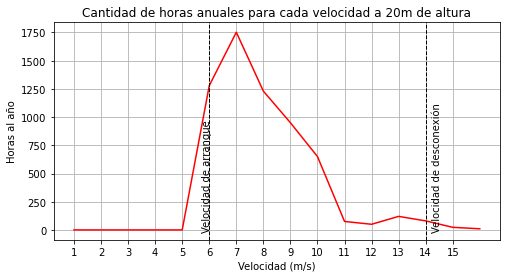

In [18]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(VientosHoras['Velocidad'],VientosHoras['Horas'], linewidth=1.5, color = 'red')
ax.set_xlabel('Velocidad (m/s)')
ax.set_ylabel('Horas al año')
ax.set(xticks=np.arange(np.min(VientosHoras['Velocidad']), np.max(VientosHoras['Velocidad'])))
ax.axvline(x=Varr, linestyle = 'dashed', linewidth=1, color = 'black')
ax.annotate('Velocidad de arranque', xy=(Varr-0.25,0), rotation=90)
ax.axvline(x=Vdesc, linestyle = 'dashed', linewidth=1, color = 'black')
ax.annotate('Velocidad de desconexión', xy=(Vdesc+0.25,0), rotation=90)
plt.grid()
plt.title('Cantidad de horas anuales para cada velocidad a 20m de altura')
plt.show()

Los datos nos muestran que tenemos una importante cantidad de horas con velocidades útiles, por encima de la velocidad de arranque y debajo de la de desconexión, sobre todo entre 6 y 9 m/s. Muy pocas o nula cantidad de horas con velocidades fuera de rango. Si comparamos con el total de horas al año, tenemos que...

In [41]:
HorasTotal = 0
for i in range(len(VientosHoras)):
    if VientosHoras.loc[i,'Velocidad'] in range(Varr, Vdesc):
        HorasTotal = HorasTotal + VientosHoras.loc[i,'Horas']
    else:
        pass
print('Total de horas al año con velocidades útiles: ', HorasTotal)
print('Porcentaje de horas útiles por año: {}%'.format((HorasTotal*100)/(365*24)))

Total de horas al año con velocidades útiles:  6106
Porcentaje de horas útiles por año: 69.70319634703196%


Contamos con 6106 horas con vientos útiles que equivalen al 69,7% total del año

Vamos a calcular la potencia correspondiente a cada velocidad. Como recordaremos, ésta viene dada por la siguiente fórmula:

$P = \frac{1} {2} * \rho_{aire} * A * V_{h}^{3}$

La densidad del aire, $\rho_{aire}$, la asumimos en $1,225 Kg/m^{3}$ como en el ejercicio anterior. $A$ hace referencia al área barrida por el generador. Como dato sabemos que el radio de nuestras palas es de 10m, por lo tanto el área circular, $\pi * r^{2}$, se calcula con base en este dato. $V_{h}$ viene siendo la velocidad a la altura del buje (centro) de nuestros aerogeneradores, 20m en nuestro caso.

Recordemos además que tenemos unas limitaciones técnicas del aerogenerador dadas por la velocidad de arranque, 3 m/s, y de desconexión de 14 m/s. Quiere decir que por debajo de la velocidad de arranque y por encima de la velocidad de desconexión no se genera potencia. Para eso establecemos las condiciones de velocidades que limiten nuestros cálculos de potencia.

In [40]:
#Densidad de aire (kg/m3)
rho = 1.225
#Area de barrido (m2)
A = np.pi*np.power(r,2)

#Definimos condiciones con los 3 escenarios:
#por debajo de V_arranque, entre V_arranque y V_desconexion y por encima de V_desconexion
condiciones = [
    (VientosHoras['Velocidad'] < Varr),
    (VientosHoras['Velocidad'] >= Varr) & (VientosHoras['Velocidad'] < Vdesc),
    (VientosHoras['Velocidad'] >= Vdesc)
]

#Definimos los respectivos valores según cada condición
#Entre V_arranque y V_desconexion se calcula la potencia, fuera de esos valores se considera nulo
valores = (0, rho * A * np.power(VientosHoras['Velocidad'],3) / 2, 0)

VientosHoras['Potencia'] = np.select(condiciones,valores)
VientosHoras.head(len(VientosHoras))

,Velocidad,Horas,Potencia
0,1,0,0.000000
1,2,0,0.000000
2,3,0,0.000000
3,4,0,0.000000
4,5,0,0.000000
5,6,1279,41563.270807
6,7,1752,66000.934661
7,8,1230,98520.345617
8,9,950,140276.038974
9,10,650,192422.550032


Añadimos a nuestra tabla una columna de potencia, en W o vatios, correspondiente a cada velocidad. Nótese que por debajo de la velocidad de arranque y por encima de la de desconexión no hay generación de potencia.

Para hallar la energía total obtenible multiplicamos la potencia por la cantidad de horas en las que se genera. El producto queda reflejado en Wh, pero dado significativo de las cifras, dividimos entre mil para expresar las cantidades en kilovatios hora (kWh). El total de energía obtenida por cada generador lo obtenemos al sumar cada cifra de energía correspondiente a cada velocidad por horas de ocurrencia.

In [43]:
VientosHoras['Energia'] = VientosHoras['Horas'] * VientosHoras['Potencia']/1000
VientosHoras.head(len(VientosHoras))

,Velocidad,Horas,Potencia,Energia
0,1,0,0.000000,0.000000
1,2,0,0.000000,0.000000
2,3,0,0.000000,0.000000
3,4,0,0.000000,0.000000
4,5,0,0.000000,0.000000
5,6,1279,41563.270807,53159.423362
6,7,1752,66000.934661,115633.637526
7,8,1230,98520.345617,121180.025108
8,9,950,140276.038974,133262.237025
9,10,650,192422.550032,125074.657521


El total de energía obtenida por cada generador lo obtenemos al sumar cada cifra de energía correspondiente a cada velocidad por horas de ocurrencia.

In [44]:
EnergiaAnual = VientosHoras['Energia'].sum()
print('La energía generable al año por cada generador es {} kWh'.format(EnergiaAnual))

La energía generable al año por cada generador es 634874.1510130668 kWh


Tenemos entonces que cada generador puede estar generando anualmente 634.874 kWh. El total de energía a producir en el parque eólico viene dado por el producto de la cantidad de aerogeneradores por la energía que cada una produce al año

In [46]:
EnergiaAnualParque = N* EnergiaAnual
print('Total de energía a producir anualmente en el parque eólico de {} aerogeneradores: {} kWh'.format(N,EnergiaAnualParque))

Total de energía a producir anualmente en el parque eólico de 80 aerogeneradores: 50789932.081045344 kWh


El parque eólico estará en capacidad de producir unos 50.790 MWh al año

Pero no debemos olvidar el límite de Betz que indica nuestras máquinas tinen un tope de generación de potencia de 59,26% de la potencia teórica. Este coeficiente se extrapola a la energía estimada.

In [47]:
EnergiaAnualTope = 0.5926 * EnergiaAnualParque
print('Tope de energía a producir anualmente en el parque eólico de {} aerogeneradores: {} kWh'.format(N,EnergiaAnualTope))

Tope de energía a producir anualmente en el parque eólico de 80 aerogeneradores: 30098113.751227472 kWh


Por lo tanto el total de la energía tope a generar de nuestro parque eólico es de 30.098 MWh al año. 